In [1]:
%%help

Magic,Example,Explanation
info,%%info,Outputs session information for the current Livy endpoint.
cleanup,%%cleanup -f,"Deletes all sessions for the current Livy endpoint, including this notebook's session. The force flag is mandatory."
delete,%%delete -f -s 0,Deletes a session by number for the current Livy endpoint. Cannot delete this kernel's session.
logs,%%logs,Outputs the current session's Livy logs.
configure,"%%configure -f{""executorMemory"": ""1000M"", ""executorCores"": 4}",Configure the session creation parameters. The force flag is mandatory if a session has already been created and the session will be dropped and recreated.Look at Livy's POST /sessions Request Body for a list of valid parameters. Parameters must be passed in as a JSON string.
spark,%%spark -o dfdf = spark.read.parquet('...,"Executes spark commands. Parameters: -o VAR_NAME: The Spark dataframe of name VAR_NAME will be available in the %%local Python context as a Pandas dataframe with the same name. -m METHOD: Sample method, either take or sample. -n MAXROWS: The maximum number of rows of a dataframe that will be pulled from Livy to Jupyter. If this number is negative, then the number of rows will be unlimited. -r FRACTION: Fraction used for sampling."
display,%%display -n 100my_spark_df,"Displays Spark dataframe as a beautiful HTML table with horizontal and vertical scroll bars(if necessary). Parameters: -m METHOD: Sample method, either take or sample. -n MAXROWS: The maximum number of rows of a dataframe to display. If this number is negative, then the number of rows will be unlimited. -r FRACTION: Fraction used for sampling."
sql,%%sql -o tables -qSHOW TABLES,"Executes a SQL query against the variable sqlContext (Spark v1.x) or spark (Spark v2.x). Parameters: -o VAR_NAME: The result of the SQL query will be available in the %%local Python context as a Pandas dataframe. -q: The magic will return None instead of the dataframe (no visualization). -m, -n, -r are the same as the %%spark parameters above."
local,%%locala = 1,All the code in subsequent lines will be executed locally. Code must be valid Python code.
send_to_spark,%%send_to_spark -o variable -t str -n var,"Sends a variable from local output to spark cluster. Parameters: -i VAR_NAME: Local Pandas DataFrame(or String) of name VAR_NAME will be available in the %%spark context as a Spark dataframe(or String) with the same name. -t TYPE: Specifies the type of variable passed as -i. Available options are: `str` for string and `df` for Pandas DataFrame. Optional, defaults to `str`. -n NAME: Custom name of variable passed as -i. Optional, defaults to -i variable name. -m MAXROWS: Maximum amount of Pandas rows that will be sent to Spark. Defaults to 2500."


In [8]:
%%configure -f 
{
"conf":{
        "spark.pyspark.python": "python3",
        "spark.pyspark.virtualenv.enabled": "true",
        "spark.pyspark.virtualenv.type":"native",
        "spark.pyspark.virtualenv.bin.path":"/usr/bin/virtualenv",
    
        "spark.executor.heartbeatInterval":"10800s",
        "spark.network.timeout":"24h",
    
        "spark.driver.memory": "1G",
        "spark.executor.memory": "1G",
        "spark.executor.cores":"2",

        "spark.app.name":"msds694"
      }
}

UsageError: Cell magic `%%configure` not found.


In [3]:
# Creates Spark Context
sc

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1636070786322_0001,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<SparkContext master=yarn appName=msds694>

In [12]:
%%info

ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1636070786322_0001,pyspark,idle,Link,Link,✔


In [4]:
# install packages - we will use plotly locally.
sc.install_pypi_package("plotly")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version  
-------------------------- ---------
aws-cfn-bootstrap          2.0      
beautifulsoup4             4.9.3    
boto                       2.49.0   
click                      7.1.2    
docutils                   0.14     
jmespath                   0.10.0   
joblib                     1.0.1    
lockfile                   0.11.0   
lxml                       4.6.3    
mysqlclient                1.4.2    
nltk                       3.5      
nose                       1.3.4    
numpy                      1.16.5   
pip                        9.0.1    
plotly                     5.3.1    
py-dateutil                2.2      
pystache                   0.5.4    
python-daemon              2.2.3    
python37-sagemaker-pyspark 1.4.1    
pytz                       2021.1   
PyYAML                     5.4.1    
regex                      2021.3.17
setuptools                 28.8.0   
simplejson                 3.2.0    
six                        1.13.0   
t

In [6]:
# RDD creation and data preprocessing
data_path = "s3://usfca-msds694-distributedcomputing/supervisor_sf.tsv"
data = sc.textFile(data_path)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [7]:
zip_id = data.map(lambda x : x.split("\t")).map(lambda x : (int(x[0]), int(x[1])))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [8]:
zip_id_count = zip_id.groupByKey().map(lambda x : (x[0], len(x[1]))).sortByKey()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
# Register the DataFrame as a SQL temporary view (In order to use the created data locally for plots)
zip_id_count_df = zip_id_count.toDF()
zip_id_count_df.createOrReplaceTempView("zip_id_count_view")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [10]:
%%sql -o zip_id_count_tab
SELECT * FROM zip_id_count_view

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Output()

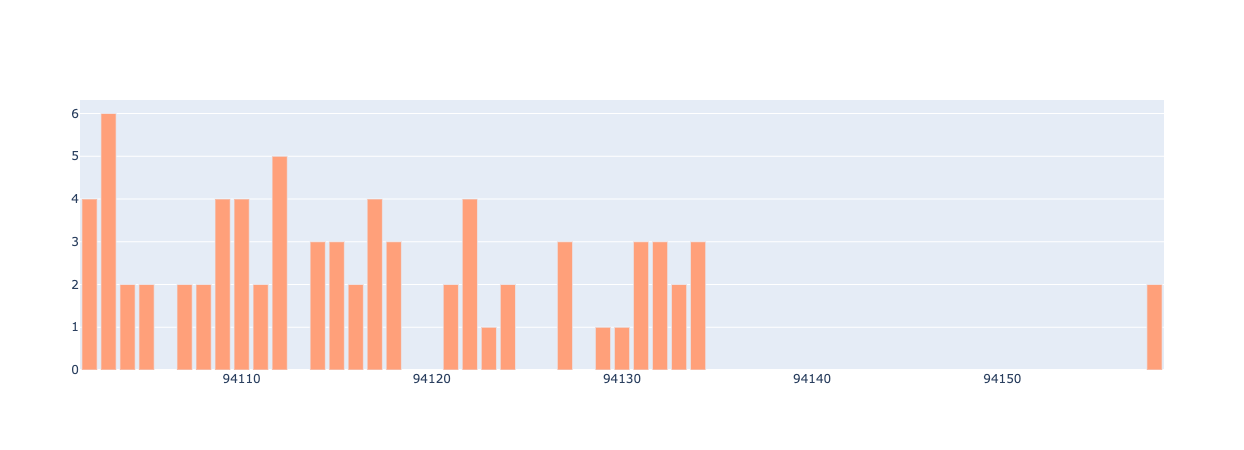

In [11]:
%%local
import plotly
import plotly.graph_objects as go

x = zip_id_count_tab['_1']
y = zip_id_count_tab['_2']

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Bar(x=x, y=y, 
                             marker_color='lightsalmon',
                             hovertext=x)])
fig.update_layout(xaxis=dict(tickformat="digit"))
fig.show()


In [13]:
sc.stop()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…